<a href="https://colab.research.google.com/github/Tan-Yu/TensorFlow-Sandbox/blob/main/Project_1_Identifying_Vehicles_in_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds


# Using CIFAR10

In [ ]:
datasets, info = tfds.load("cifar10", with_info = True)
train_dataset, test_dataset = datasets["train"], datasets["test"]
assert isinstance(train_dataset, tf.data.Dataset)
cifar10_builder = tfds.builder('cifar10')


In [ ]:
info = cifar10_builder.info
print(info)


tfds.core.DatasetInfo(
    name='cifar10',
    full_name='cifar10/3.0.2',
    description="""
    The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_path='/root/tensorflow_datasets/cifar10/3.0.2',
    file_format=tfrecord,
    download_size=162.17 MiB,
    dataset_size=132.40 MiB,
    features=FeaturesDict({
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(32, 32, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=50000, num_shards=1>,
    },
    citation="""@TECHREPORT{Krizhevsky09learningmultiple,
        author = {Alex Krizhevsky},
        title = {Learn

In [ ]:
for batch in train_dataset.batch(50000):
    x_train = batch["image"]
    y_train = batch["label"].numpy().astype("uint8")
for batch in test_dataset.batch(10000):
    x_test = batch["image"]
    y_test = batch["label"].numpy().astype("uint8")


In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)),
tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", input_shape=(32, 32, 3)),
tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
tf.keras.layers.MaxPooling2D((2, 2)),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(128, activation="relu"),
tf.keras.layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])


In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               3686912   
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                      

In [ ]:
model.fit(x_train, y_train, epochs=25)


Epoch 1/25
1563/1563 [==============================] - 11s 5ms/step - loss: 1.7705 - accuracy: 0.3770
Epoch 2/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2635 - accuracy: 0.5518
Epoch 3/25
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0593 - accuracy: 0.6279
Epoch 4/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9259 - accuracy: 0.6789
Epoch 5/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8296 - accuracy: 0.7133
Epoch 6/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7468 - accuracy: 0.7404
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6738 - accuracy: 0.7660
Epoch 8/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6123 - accuracy: 0.7848
Epoch 9/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5557 - accuracy: 0.8035
Epoch 10/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.50

In [ ]:
model.evaluate(x_test, y_test, verbose=1)


313/313 [==============================] - 1s 3ms/step - loss: 1.7859 - accuracy: 0.6755


[1.7858808040618896, 0.6754999756813049]

Test Image:


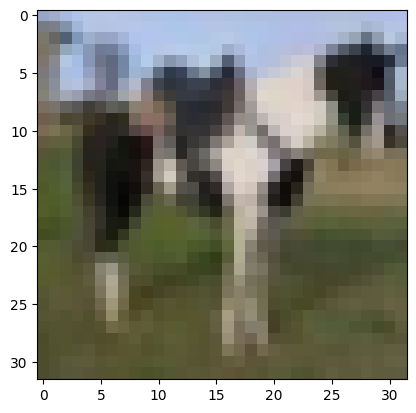

1/1 [==============================] - 0s 19ms/step
Prediction: cat with probability 99.89%


In [ ]:
import numpy as np

# Get a random test image
test_image = x_test[np.random.choice(x_test.shape[0], size=1, replace=False).item()]

# Print the test image
print("Test Image:")
plt.imshow(test_image)
plt.show()

# Make a prediction on the test image
prediction = model.predict(np.expand_dims(test_image, axis=0))[0]

# Get the category name with the highest probability
category = info.features['label'].names[np.argmax(prediction)]

# Print the prediction
print("Prediction: {} with probability {:.2f}%".format(category, prediction.max()*100))


In [ ]:
info.features['label'].names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']